# Wine 

# Table of Contents
1. [Data Preparation](#1.-Data-Preparation)
2. [Exploratory Data Analysis (EDA)](#2.-Exploratory-Data-Analysis(EDA))
3. [Data Enrichment](#3.-Data-Enrichment)
4. [Statistical Analysis](#4.-Statistical-Analysis)
5. [Correlation](#5.-Correlation)
6. [Principal Component Analysis & K-means Clustering](#6.-PCA&Kmeans)
7. [Data Analysis](#7.-Data-Analysis)

# 1. Data Preparation
Read the dataset using the “pandas” library.   
Identify the missing data both row- and column-wise in the dataset.

## 1.1 Load Wine.csv

In [115]:
# import pandas library using alias pd
import pandas as pd

# load the data
wine_data = pd.read_csv(filepath_or_buffer='wine.csv')

# view first few rows of the data
wine_data.head(5)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


**Column Descriptions**

1. Wine: 3 different cultivators of wine are represented by the three integers: 1 to 3
2. 13 components found in the wine: Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, Proline

## 1.2 Shape and Info of Columns

In [116]:
# shape of data
wine_data.shape

(178, 14)

It can be observed that the dataset has 178 rows and 14 columns. There are 178 samples and 14 attributes.

In [117]:
# concise summary of the dataset
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  177 non-null    float64
 1   Alcohol               175 non-null    float64
 2   Malic.acid            177 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   171 non-null    float64
 5   Mg                    177 non-null    float64
 6   Phenols               174 non-null    float64
 7   Flavanoids            174 non-null    float64
 8   Nonflavanoid.phenols  177 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             172 non-null    float64
 11  Hue                   178 non-null    object 
 12  OD                    177 non-null    float64
 13  Proline               171 non-null    float64
dtypes: float64(13), object(1)
memory usage: 19.6+ KB


It shows that not all the columns have 178 values. There are some missing values.

**Identify number of missing values**

In [118]:
wine_data.isna().sum()

Wine                    1
Alcohol                 3
Malic.acid              1
Ash                     0
Acl                     7
Mg                      1
Phenols                 4
Flavanoids              4
Nonflavanoid.phenols    1
Proanth                 0
Color.int               6
Hue                     0
OD                      1
Proline                 7
dtype: int64

There exists some missing values in wine data.

**Identify number of duplicated**

In [119]:
df = wine_data
duplicates = df[df.duplicated()]
if not duplicates.empty:
    print("There are duplicate records:")
    print(duplicates)
else:
    print("No duplicate records")

No duplicate records


There is no duplicate records in wine data.

***

# 2. Exploratory Data Analysis(EDA)

Using partially cleaned data to do EDA. Those partially cleaned data finished Data Type Conversion, and Removing Duplicates.

## 2.1 EDA Univariate 

In univariate EDA, I'll explore each column in isolation to identify its distribution and/or data quality issues. 

### 2.1.1 Column Wine

In [120]:
# summarize wine
wine_data["Wine"].describe()

count    177.000000
mean       1.932203
std        0.773078
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Wine, dtype: float64

<Axes: title={'center': 'Distribution of Wine Cultivators'}, ylabel='proportion'>

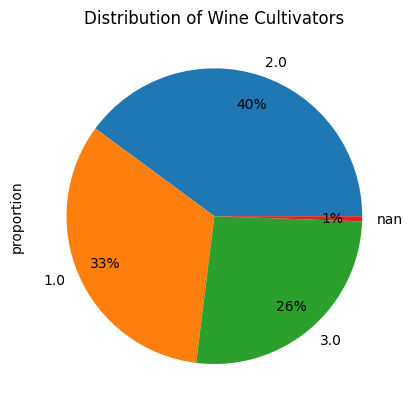

In [121]:
# plot distribution of the 'wine' column
wine_distribution = wine_data["Wine"].value_counts(dropna=False, normalize=True)
wine_distribution.plot.pie(autopct='%1.0f%%', pctdistance=0.8, radius=1, title="Distribution of Wine Cultivators")

40% of the total is attributed to cultivator 2.0.  
Of the dataset, 33% is accounted for by Cultivator 1.0.  
Cultivator 3.0 makes up 26% of the data.  
Additionally, a small portion (1% of the total) is dedicated to missing data (nan).  

### 2.1.2 Column Alcohol 

In [122]:
# summarize Alcohol
wine_data["Alcohol"].describe()

count    175.000000
mean      13.004914
std        0.813065
min       11.030000
25%       12.365000
50%       13.050000
75%       13.685000
max       14.830000
Name: Alcohol, dtype: float64

<Axes: title={'center': 'Distribution of Alcohol'}>

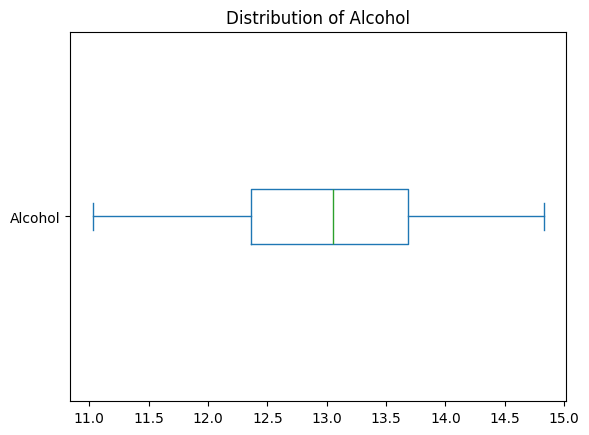

In [123]:
# box plot of Alcohol
wine_data["Alcohol"].plot.box(vert=False,title="Distribution of Alcohol")

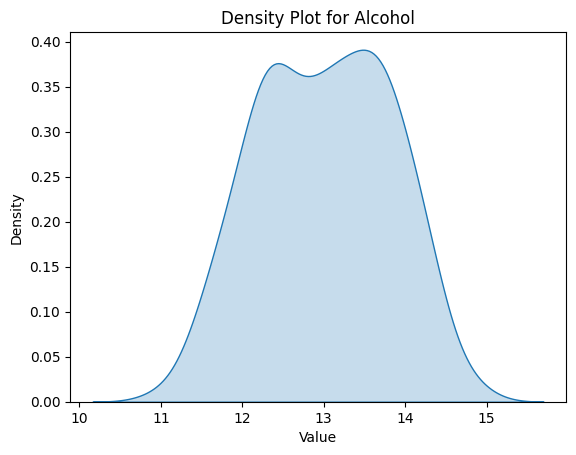

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(wine_data['Alcohol'], fill=True)
plt.title('Density Plot for Alcohol')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

It can be observed that majority of the Alcohol are between 12 and 13.75 without outliers.

### 2.1.3 Column Malic.acid

In [125]:
# summarize Maclic.acid
wine_data["Malic.acid"].describe()

count    177.000000
mean       2.336045
std        1.120308
min        0.740000
25%        1.600000
50%        1.860000
75%        3.100000
max        5.800000
Name: Malic.acid, dtype: float64

<Axes: title={'center': 'Distribution of Malic.acid'}>

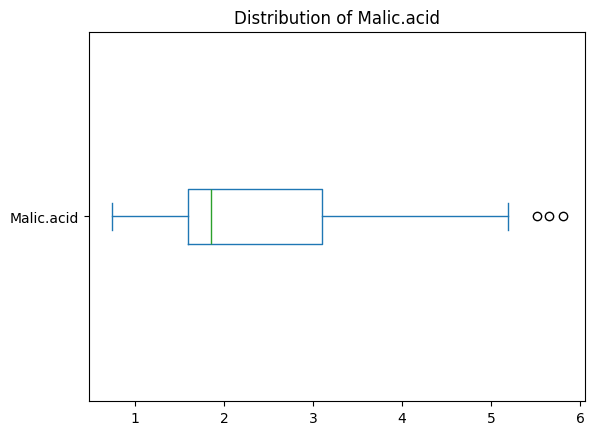

In [126]:
# box plot of Malic.acid
wine_data["Malic.acid"].plot.box(vert=False,title="Distribution of Malic.acid")

There are some ouliers in the data of Malic.acid.

In [127]:
# identify out of bound values in Malic-acid
# following will return true for out of bound values and false otherwise
Q1 = wine_data["Malic.acid"].quantile(0.25)
Q3 = wine_data["Malic.acid"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# find outliers
outliers = wine_data["Malic.acid"][(wine_data["Malic.acid"] < lower_bound) | (wine_data["Malic.acid"] > upper_bound)]

print("Outliers：")
print(outliers)

outliers = min(outliers)

boolean_mask1 = wine_data["Malic.acid"] > upper_bound
# count out of bound values
boolean_mask1.sum()

Outliers：
123    5.80
137    5.51
173    5.65
Name: Malic.acid, dtype: float64


3

In [128]:
# import numpy with alias np
import numpy as np

# mark out of bounds as missing values (np.nan) 
wine_data.loc[boolean_mask1, "Malic.acid"] = np.nan 

# verify that out of bounds are now removed 
wine_data["Malic.acid"].describe()

count    174.000000
mean       2.278851
std        1.040429
min        0.740000
25%        1.592500
50%        1.830000
75%        3.020000
max        5.190000
Name: Malic.acid, dtype: float64

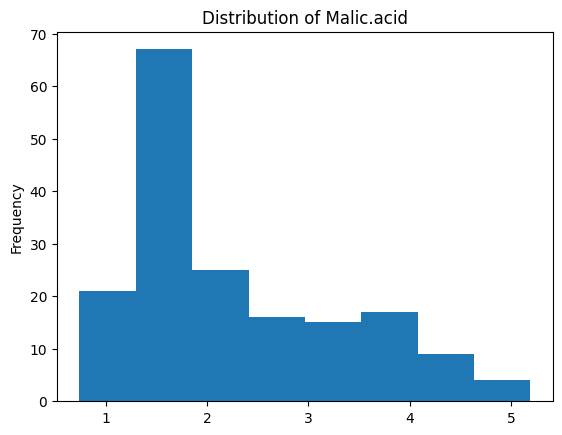

In [129]:
# histogram of Alcohol
wine_data["Malic.acid"].plot.hist(grid=False, bins=8, title="Distribution of Malic.acid");

The majority of the samples have Malic acid concentrations between 1.5 and 2.

### 2.1.4 Column Ash

In [130]:
# summarize Ash
wine_data["Ash"].describe()

count    178.000000
mean       2.366517
std        0.274344
min        1.360000
25%        2.210000
50%        2.360000
75%        2.557500
max        3.230000
Name: Ash, dtype: float64

<Axes: title={'center': 'Boxplot of Ash'}>

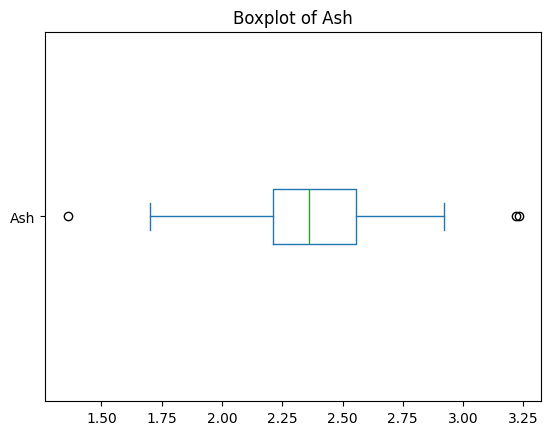

In [131]:
# boxpolt of Ash
wine_data["Ash"].plot.box(vert=False,title="Boxplot of Ash")

There are some outliers in the data of Ash.

In [132]:
# identify out of bound values in Ash
Q1 = wine_data["Ash"].quantile(0.25)
Q3 = wine_data["Ash"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# following will return true for out of bound values and false otherwise
boolean_mask2 = (wine_data["Ash"] > upper_bound)| (wine_data["Ash"] < lower_bound)

# count out of bound values
boolean_mask2.sum()

3

In [133]:
# mark out of bounds as missing values (np.nan) 
wine_data.loc[boolean_mask2, "Ash"] = np.nan 

# verify that out of bounds are now removed 
wine_data["Ash"].describe()

count    175.000000
mean       2.362457
std        0.249503
min        1.700000
25%        2.210000
50%        2.360000
75%        2.545000
max        2.920000
Name: Ash, dtype: float64

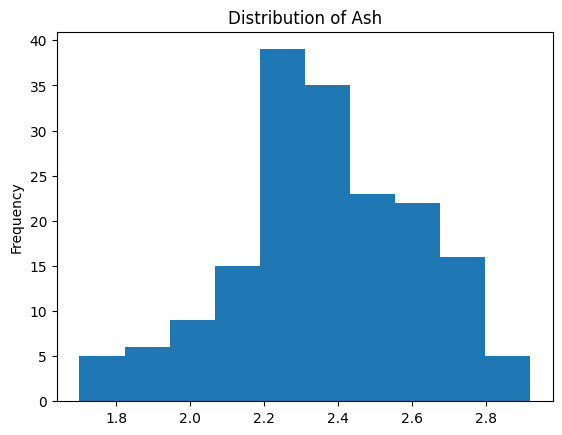

In [134]:
# histogram of Ash
wine_data["Ash"].plot.hist(grid=False, bins=10, title="Distribution of Ash");

The majority of the samples have Ash component between 2.2 g/L and 2.5 g/L.

### 2.1.5 Column Alcalinity of Ash(Acl)

In [135]:
# summarize Acl
wine_data["Acl"].describe()

count    171.000000
mean      19.493567
std        3.338248
min       10.600000
25%       17.200000
50%       19.400000
75%       21.500000
max       30.000000
Name: Acl, dtype: float64

<Axes: title={'center': 'Boxplot of Acl'}>

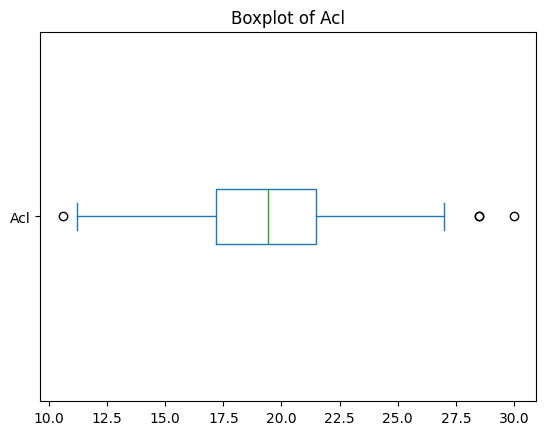

In [136]:
# boxplot of Acl
wine_data["Acl"].plot.box(vert=False,title="Boxplot of Acl")

In [137]:
# identify out of bound values in Acl
Q1 = wine_data["Acl"].quantile(0.25)
Q3 = wine_data["Acl"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# following will return true for out of bound values and false otherwise
boolean_mask3 = (wine_data["Acl"] > upper_bound)| (wine_data["Acl"] < lower_bound)

# count out of bound values
boolean_mask3.sum()

4

In [138]:
# mark out of bounds as missing values (np.nan)
wine_data.loc[boolean_mask3, "Acl"] = np.nan

# verify that out of bounds are now removed 
wine_data["Acl"].describe()

count    167.000000
mean      19.376048
std        3.046274
min       11.200000
25%       17.200000
50%       19.100000
75%       21.500000
max       27.000000
Name: Acl, dtype: float64

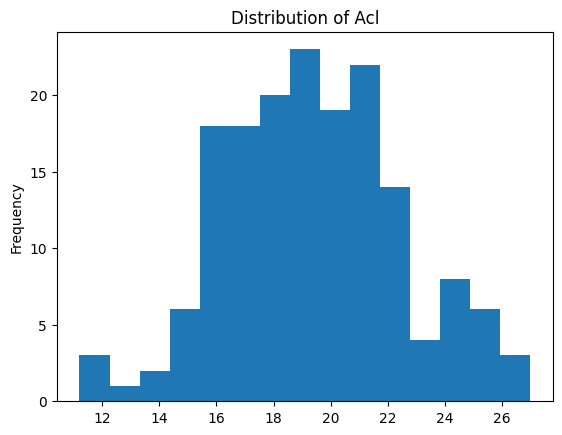

In [139]:
# histogram of Acl
wine_data["Acl"].plot.hist(grid=False, bins=15, title="Distribution of Acl");

The majority of the samples have Acl values between 15.5 and 22.5 g/L, with the highest frequencies observed around 17.5 and 21.5 g/L.  

### 2.1.6 Column Magnesisum(Mg)

In [140]:
#summarize Mg
wine_data["Mg"].describe()

count    177.000000
mean      99.819209
std       14.285286
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      162.000000
Name: Mg, dtype: float64

<Axes: title={'center': 'Boxplot of Mg'}>

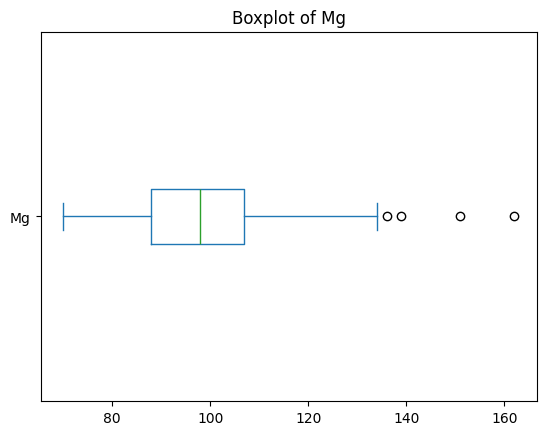

In [141]:
# boxplot of Mg
wine_data["Mg"].plot.box(vert=False,title="Boxplot of Mg")

In [142]:
# identify out of bound values in Mg
Q1 = wine_data["Mg"].quantile(0.25)
Q3 = wine_data["Mg"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# following will return true for out of bound values and false otherwise
boolean_mask4 = wine_data["Mg"] > upper_bound

# count out of bound values
boolean_mask4.sum()

4

In [143]:
# mark out of bounds as missing values (np.nan)
wine_data.loc[boolean_mask4, "Mg"] = np.nan

# verify that out of bounds are now removed 
wine_data["Mg"].describe()

count    173.000000
mean      98.728324
std       12.384403
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      134.000000
Name: Mg, dtype: float64

The Mg cextend to the minimum and maximum values of the data, approximately 70 and 135.5, respectively. The green line inside the box plot represents the median, which is 98.0, indicating that half of the Mg values are above 98.0 and the other half are below.

### 2.1.7 Column Total phenols(Phenols)

In [144]:
# summarize Phenols
wine_data["Phenols"].describe()

count    174.000000
mean       2.291897
std        0.629569
min        0.980000
25%        1.725000
50%        2.355000
75%        2.800000
max        3.880000
Name: Phenols, dtype: float64

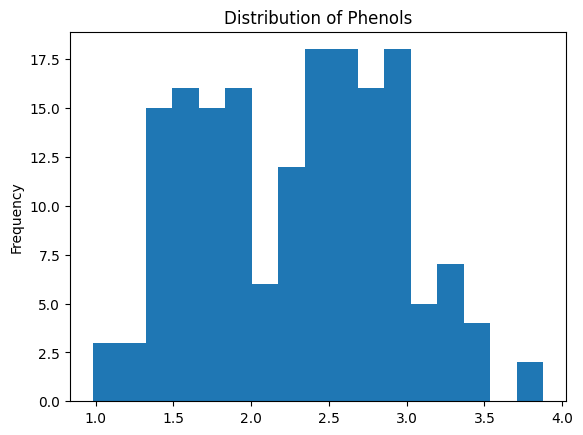

In [145]:
# histogram of Phenols
wine_data["Phenols"].plot.hist(grid=False, bins=17, title="Distribution of Phenols");

The phenol content in most wine samples ranges from 1.0 g/L to 3.5 g/L, with several peaks around 1.5 g/L, 2.5 g/L, and 3.0 g/L.   

### 2.1.8 Column Flavanoids

In [146]:
# summarize Flavanoids
wine_data["Flavanoids"].describe()

count    174.000000
mean       2.043333
std        0.997185
min        0.340000
25%        1.227500
50%        2.155000
75%        2.887500
max        5.080000
Name: Flavanoids, dtype: float64

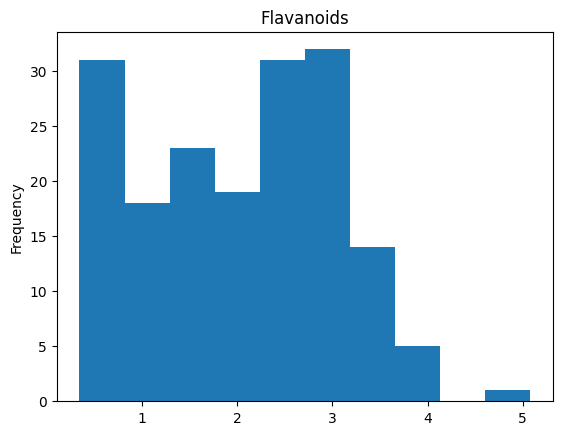

In [147]:
# histogram of Flavanoids
wine_data["Flavanoids"].plot.hist(grid=False, bins=10, title="Flavanoids");

The flavonoids content in most wine samples ranges from 0.3 g/L to 4.2 g/L, with several peaks, particularly around 0.3 g/L, 2.3 g/L, and 3.2 g/L. 

### 2.1.9 Column Nonflavanoid.phenols

In [148]:
# summarize Nonflavanoid.phenols
wine_data["Nonflavanoid.phenols"].describe()

count    177.000000
mean       0.361186
std        0.124486
min        0.130000
25%        0.270000
50%        0.340000
75%        0.430000
max        0.660000
Name: Nonflavanoid.phenols, dtype: float64

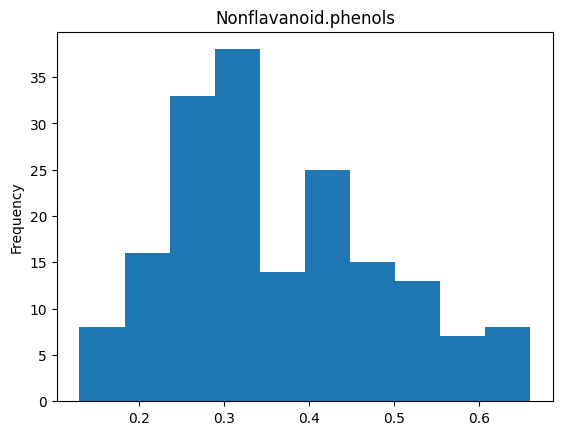

In [149]:
# histogram of Nonflavanoid.phenols
wine_data["Nonflavanoid.phenols"].plot.hist(grid=False, bins=10, title="Nonflavanoid.phenols");

Most wine samples have nonflavonoid phenols content between 0.2 and 0.4 g/L, with the highest frequencies observed around 0.3 g/L.

### 2.1.10 Column Proanthocyanins(Proanth)

In [150]:
# summarize Proanth
wine_data["Proanth"].describe()

count    178.000000
mean       1.590899
std        0.572359
min        0.410000
25%        1.250000
50%        1.555000
75%        1.950000
max        3.580000
Name: Proanth, dtype: float64

<Axes: title={'center': 'Boxplot of Proanth'}>

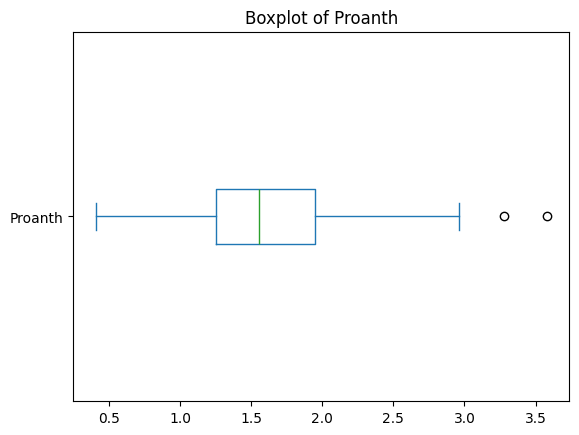

In [151]:
#boxplot of Proanth
wine_data["Proanth"].plot.box(vert=False,title="Boxplot of Proanth")

There are some outliers in the Proanth.

In [152]:
# identify out of bound values in Proanth
Q1 = wine_data["Proanth"].quantile(0.25)
Q3 = wine_data["Proanth"].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

# following will return true for out of bound values and false otherwise
boolean_mask5 = wine_data["Proanth"] > upper_bound
# count out of bound values
boolean_mask5.sum()

2

In [153]:
# mark out of bounds as missing values (np.nan)
wine_data.loc[boolean_mask4, "Proanth"] = np.nan

# verify that out of bounds are now removed 
wine_data["Proanth"].describe()

count    174.000000
mean       1.567126
std        0.551945
min        0.410000
25%        1.242500
50%        1.540000
75%        1.915000
max        3.580000
Name: Proanth, dtype: float64

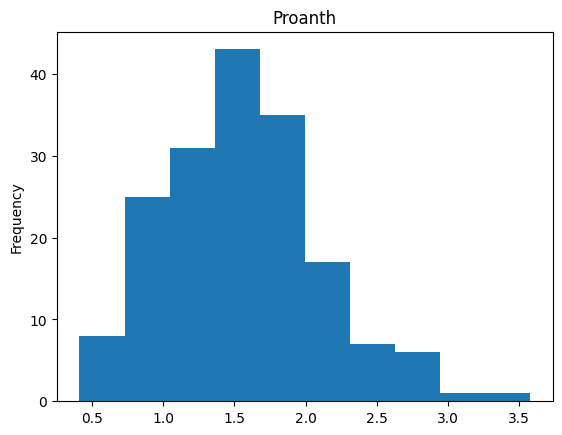

In [154]:
# histogram of Proanth
wine_data["Proanth"].plot.hist(grid=False, bins=10, title="Proanth");

Most wine samples have proanthocyanidins component between 0.5 g/L and 2.5 g/L, with the highest frequency observed around 1.5 g/L.

### 2.1.11 Column Color intensity(Color.int)

In [155]:
# summarize Color.int
wine_data["Color.int"].describe()

count    172.000000
mean       5.040640
std        2.313647
min        1.280000
25%        3.200000
50%        4.690000
75%        6.200000
max       13.000000
Name: Color.int, dtype: float64

<Axes: title={'center': 'Color.int'}>

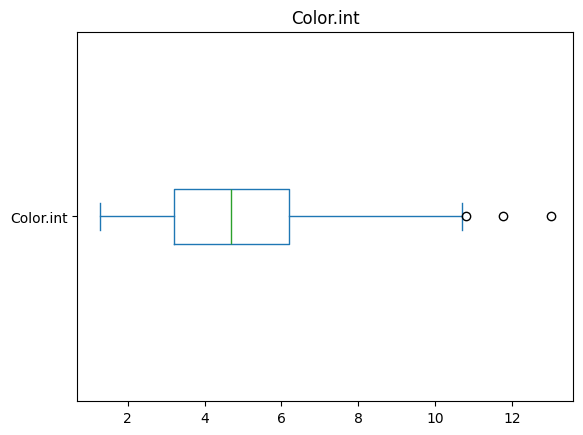

In [156]:
#boxplot of Color.int
wine_data["Color.int"].plot.box(vert=False,title="Color.int")

图中显示有异常值

In [157]:
# identify out of bound values in Color.int
# following will return true for out of bound values and false otherwise
boolean_mask6 = wine_data["Color.int"] > 11

# count out of bound values
boolean_mask6.sum()

2

In [158]:
# mark out of bounds as missing values (np.nan)
wine_data.loc[boolean_mask6, "Color.int"] = np.nan

# verify that out of bounds are now removed 
wine_data["Color.int"].describe()

count    170.000000
mean       4.954353
std        2.183483
min        1.280000
25%        3.180000
50%        4.640000
75%        6.122500
max       10.800000
Name: Color.int, dtype: float64

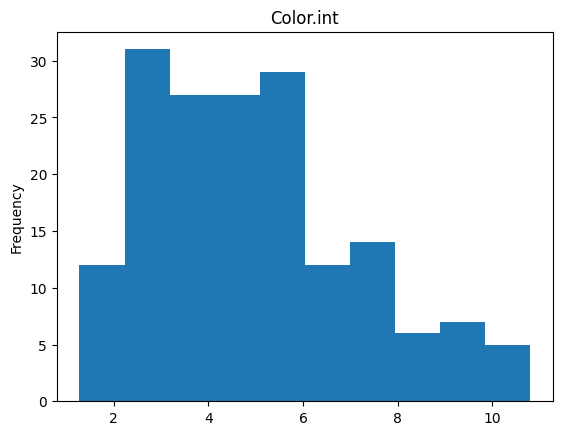

In [159]:
# histogram of Color.int
wine_data["Color.int"].plot.hist(grid=False, bins=10, title="Color.int");

Most wine samples have a color intensity between 2 and 6 AU, with the highest frequencies observed around 2 to 4 AU.

### 2.1.12 Column Hue

In [160]:
# summarize Hue
wine_data["Hue"].describe()

count      178
unique      79
top       1.04
freq         8
Name: Hue, dtype: object

In [161]:
wine_data["Hue"].unique()

array(['1.04', '1.05', '1.03', '0.86', '1.02', '1.06', '1.08', '1.01',
       '1.25', '1.17', '1.15', '1.2', '1.28', '1.07', '1.13', '1.23',
       '0.96', '1.09', '1.11', '1.12', '0.92', '1,02', '1.19', '1.1',
       '1.18', '0.89', '0.95', '0.91', '0.88', '0.82', '0.87', '1.24',
       '0.98', '0.94', '1.22', '1.45', '0.906', '1.36', '1.31', '0.99',
       '1.38', '1.16', '0.84', '0.79', '1.33', '1', '1.42', '1.27', '0.8',
       '0.75', '0.9', '0.93', '1.71', '0.7', '0.73', '0.69', '0.97',
       '0.76', '0.74', '0.66', '0.78', '0.81', '0.77', '0.65', '0.6',
       '0.58', '0.54', '0.55', '0.57', '0.59', '0.48', '0.61', '0.56',
       '0.67', '0.68', '0.85', '0.72', '0.62', '0.64'], dtype=object)

In [162]:
Hue_distribution = wine_data["Hue"].value_counts().nlargest(10)
Hue_distribution

Hue
1.04    8
1.23    7
1.12    6
0.89    5
0.57    5
0.96    5
1.25    5
1.07    4
1.05    4
1.19    4
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of Hue'}, xlabel='Hue', ylabel='Count of Hue'>

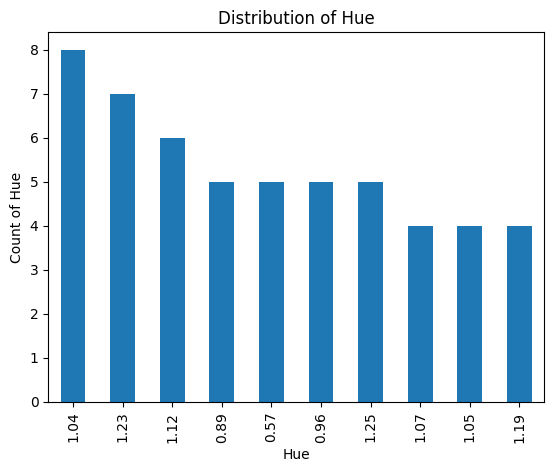

In [163]:
# plot distribution of the 'Hue' column
Hue_distribution.plot.bar(xlabel="Hue", ylabel="Count of Hue", grid=False, title = "Distribution of Hue")

The 10 highest hue values range from approximately 0.57 to 1.25, with the most common hue value being around 1.04, appearing 8 times. There are a few peaks at specific hue values such as 1.04, 1.23, and 1.12, indicating these are the most common hue values in the dataset.

### 2.1.13 Column OD280/OD315 of diluted wines(OD)

In [164]:
# summarize OD
wine_data["OD"].describe()

count    177.000000
mean       2.617232
std        0.708127
min        1.270000
25%        1.960000
50%        2.780000
75%        3.170000
max        4.000000
Name: OD, dtype: float64

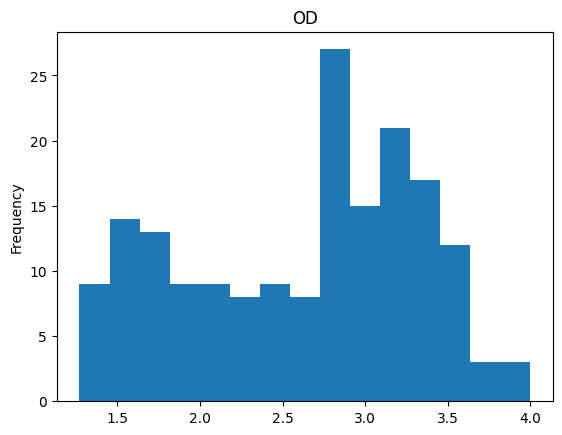

In [165]:
# histogram of OD
wine_data["OD"].plot.hist(grid=False, bins=15, title="OD");

The histogram illustrates the distribution of OD values, where most of the samples are concentrated around 3.0. There is a noticeable peak at 3.0, indicating that this OD value is the most frequent among the samples. The distribution shows a slight decrease in frequency as OD values move away from 3.0 in either direction. The data is spread across a range from approximately 1.0 to 4.0, with fewer samples having OD values below 2.0 or above 3.5.  

### 2.1.14 Column Proline

In [166]:
# summarize Proline
wine_data["Proline"].describe()

count     171.000000
mean      745.169591
std       319.059077
min       278.000000
25%       500.000000
50%       660.000000
75%       987.500000
max      1680.000000
Name: Proline, dtype: float64

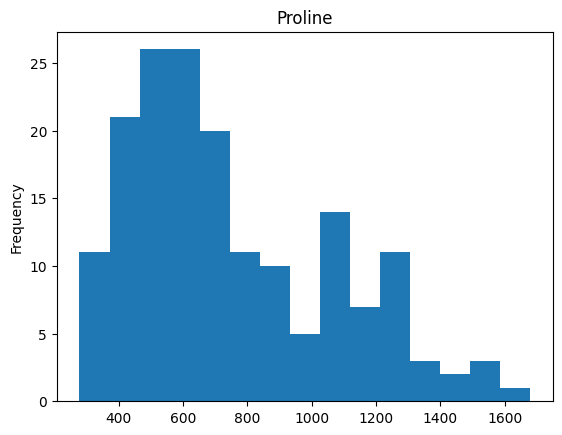

In [167]:
# histogram of Proline
wine_data["Proline"].plot.hist(grid=False, bins=15, title="Proline");

Most wine samples have a proline content ranging from 400 to 800 mg/L, with the highest frequency observed around 600 mg/L.
The distribution is right-skewed, with a gradual decline in frequency as the proline content increases beyond 800 mg/L. Very few samples have a proline content above 1200 mg/L, indicating that high proline concentrations are less common in this dataset. 

## 2.2 Bivate EDA

After removing outliers in the part 2.1, there are some Bivate EDA there by using partially cleaned data.

In [168]:
wine_data.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

### 2.2.1 Different Components Trends across Different Cultivators

   Wine  Alcohol  Malic.acid   Ash   Acl     Mg  Phenols  Flavanoids  \
0   1.0    14.23        1.71  2.43  15.6  127.0     2.80        3.06   
1   1.0    13.20        1.78  2.14  11.2  100.0     2.65        2.76   
2   1.0    13.16        2.36  2.67  18.6  101.0     2.80        3.24   
3   1.0    14.37        1.95  2.50  16.8  113.0     3.85        3.49   
4   1.0    13.24        2.59  2.87  21.0  118.0     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92   1065.0  
1                  0.26     1.28       4.38  1.05  3.40   1050.0  
2                  0.30     2.81       5.68  1.03  3.17   1185.0  
3                  0.24     2.18       7.80  0.86  3.45   1480.0  
4                  0.39     1.82       4.32  1.04  2.93    735.0  
    Wine  Alcohol  Malic.acid   Ash   Acl     Mg  Phenols  Flavanoids  \
59   2.0    12.37        0.94   NaN   NaN   88.0     1.98        0.57   
60   2.0    12.33  

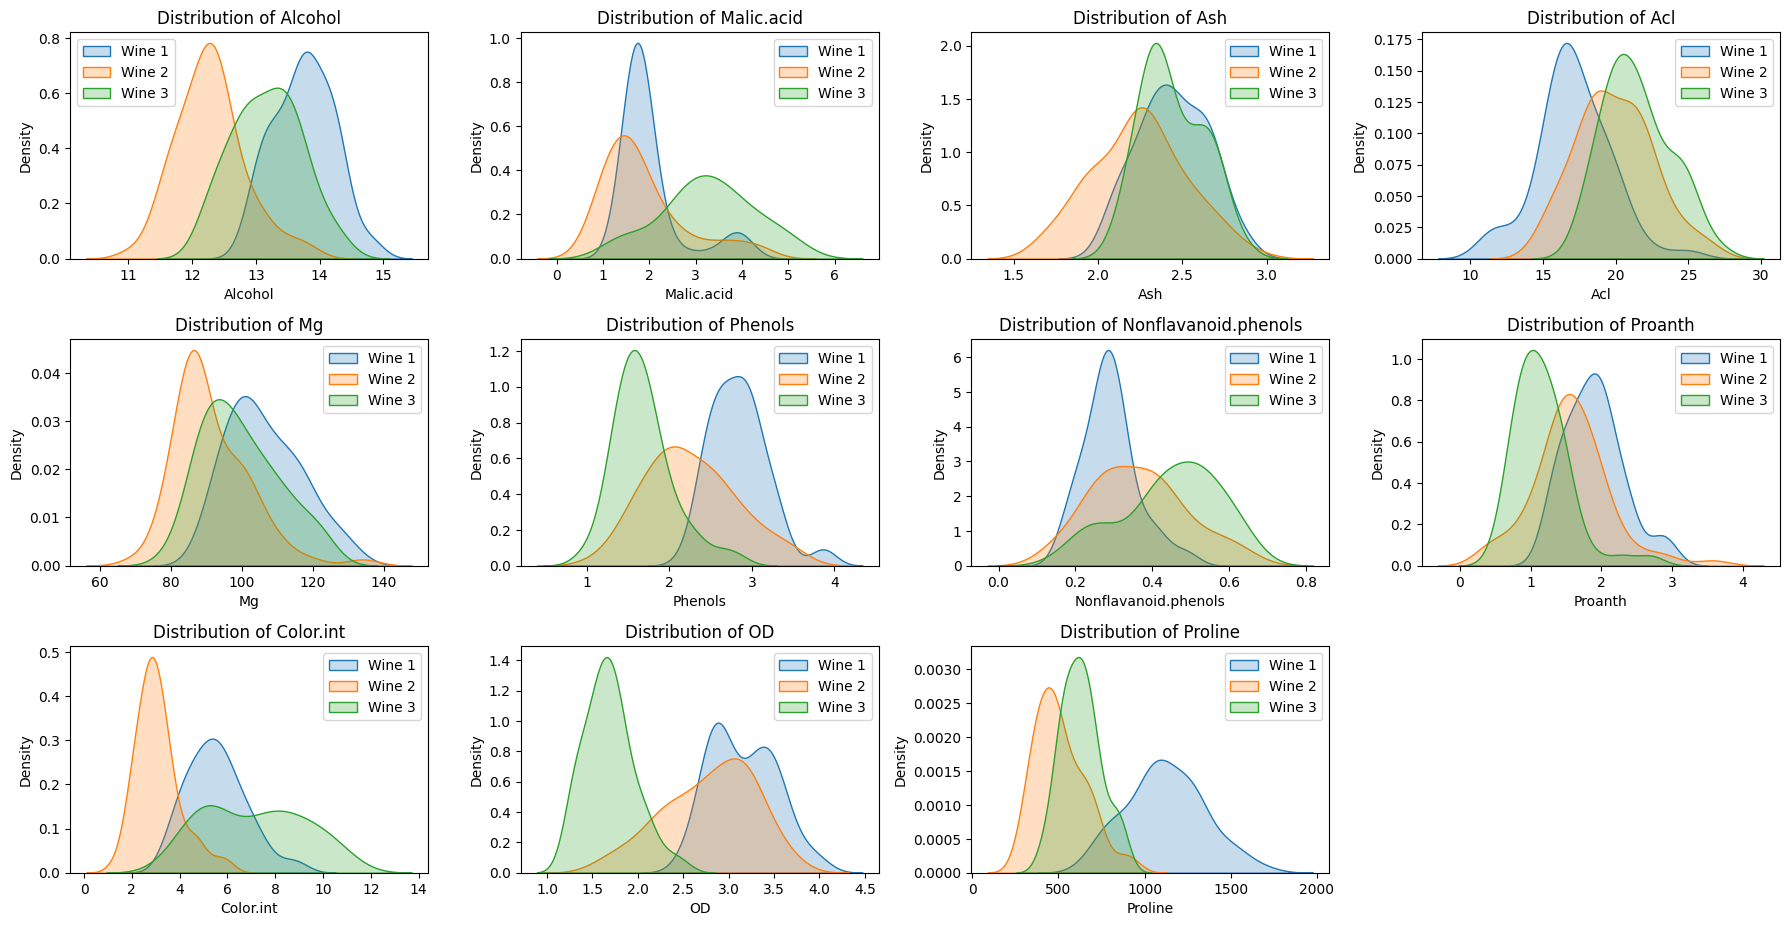

In [169]:
# Group by different cultivators
wine_1 = df[df['Wine'] == 1]
wine_2 = df[df['Wine'] == 2]
wine_3 = df[df['Wine'] == 3]

# Check data
print(wine_1.head())
print(wine_2.head())
print(wine_3.head())

# Select interested components
chemical_columns = df.select_dtypes(include=['float64', 'int64']).columns
chemical_columns = chemical_columns.drop(['Wine','Flavanoids'])

# Create a canvas with multiple subplots
plt.figure(figsize=(18, 12))

# Plot the distribution of each chemical component for each wine variety
for i, column in enumerate(chemical_columns):
    plt.subplot(4, 4, i + 1)
    sns.kdeplot(wine_1[column], label='Wine 1', fill=True)
    sns.kdeplot(wine_2[column], label='Wine 2', fill=True)
    sns.kdeplot(wine_3[column], label='Wine 3', fill=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

Based on the Kernel Density Estimate plots, the Ash and Mg components exhibit similar trends across different cultivars. In contrast, there are distinct distributions among the cultivars for components such as Alcohol, Malic.acid, Acl, Phenols, Nonflavanoid.phenols, Proanth, Color.int, and Proline. The components with the most pronounced differences among the cultivars are Color.int and Proline. Color.int and Proline can be used to distinguish between different wine cultivators.

### 2.2.2 Correlation among numeric data

In [170]:
wine_data.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

In [171]:
# correlation heatmap 
numeric_data = wine_data[["Mg", "Ash", "Acl", 
                               "Color.int","Proline","Alcohol","Malic.acid"]]

numeric_data.corr().style.background_gradient(cmap='YlOrRd')

,Mg,Ash,Acl,Color.int,Proline,Alcohol,Malic.acid
Mg,1.000000,0.388168,-0.111564,0.377530,0.431228,0.364442,0.046046
Ash,0.388168,1.000000,0.347024,0.229737,0.239411,0.254565,0.171428
Acl,-0.111564,0.347024,1.000000,-0.020900,-0.492940,-0.291518,0.329640
Color.int,0.377530,0.229737,-0.020900,1.000000,0.383365,0.557612,0.324358
Proline,0.431228,0.239411,-0.492940,0.383365,1.000000,0.643093,-0.168683
Alcohol,0.364442,0.254565,-0.291518,0.557612,0.643093,1.000000,0.117638
Malic.acid,0.046046,0.171428,0.329640,0.324358,-0.168683,0.117638,1.000000


It can be observed that there is a strong positive correlation between Alcohol and Proline. In other words, higher alcohol indicates higher proline component contained in the wine.

### 2.2.3 The relationship between Chemical Components and Color.int

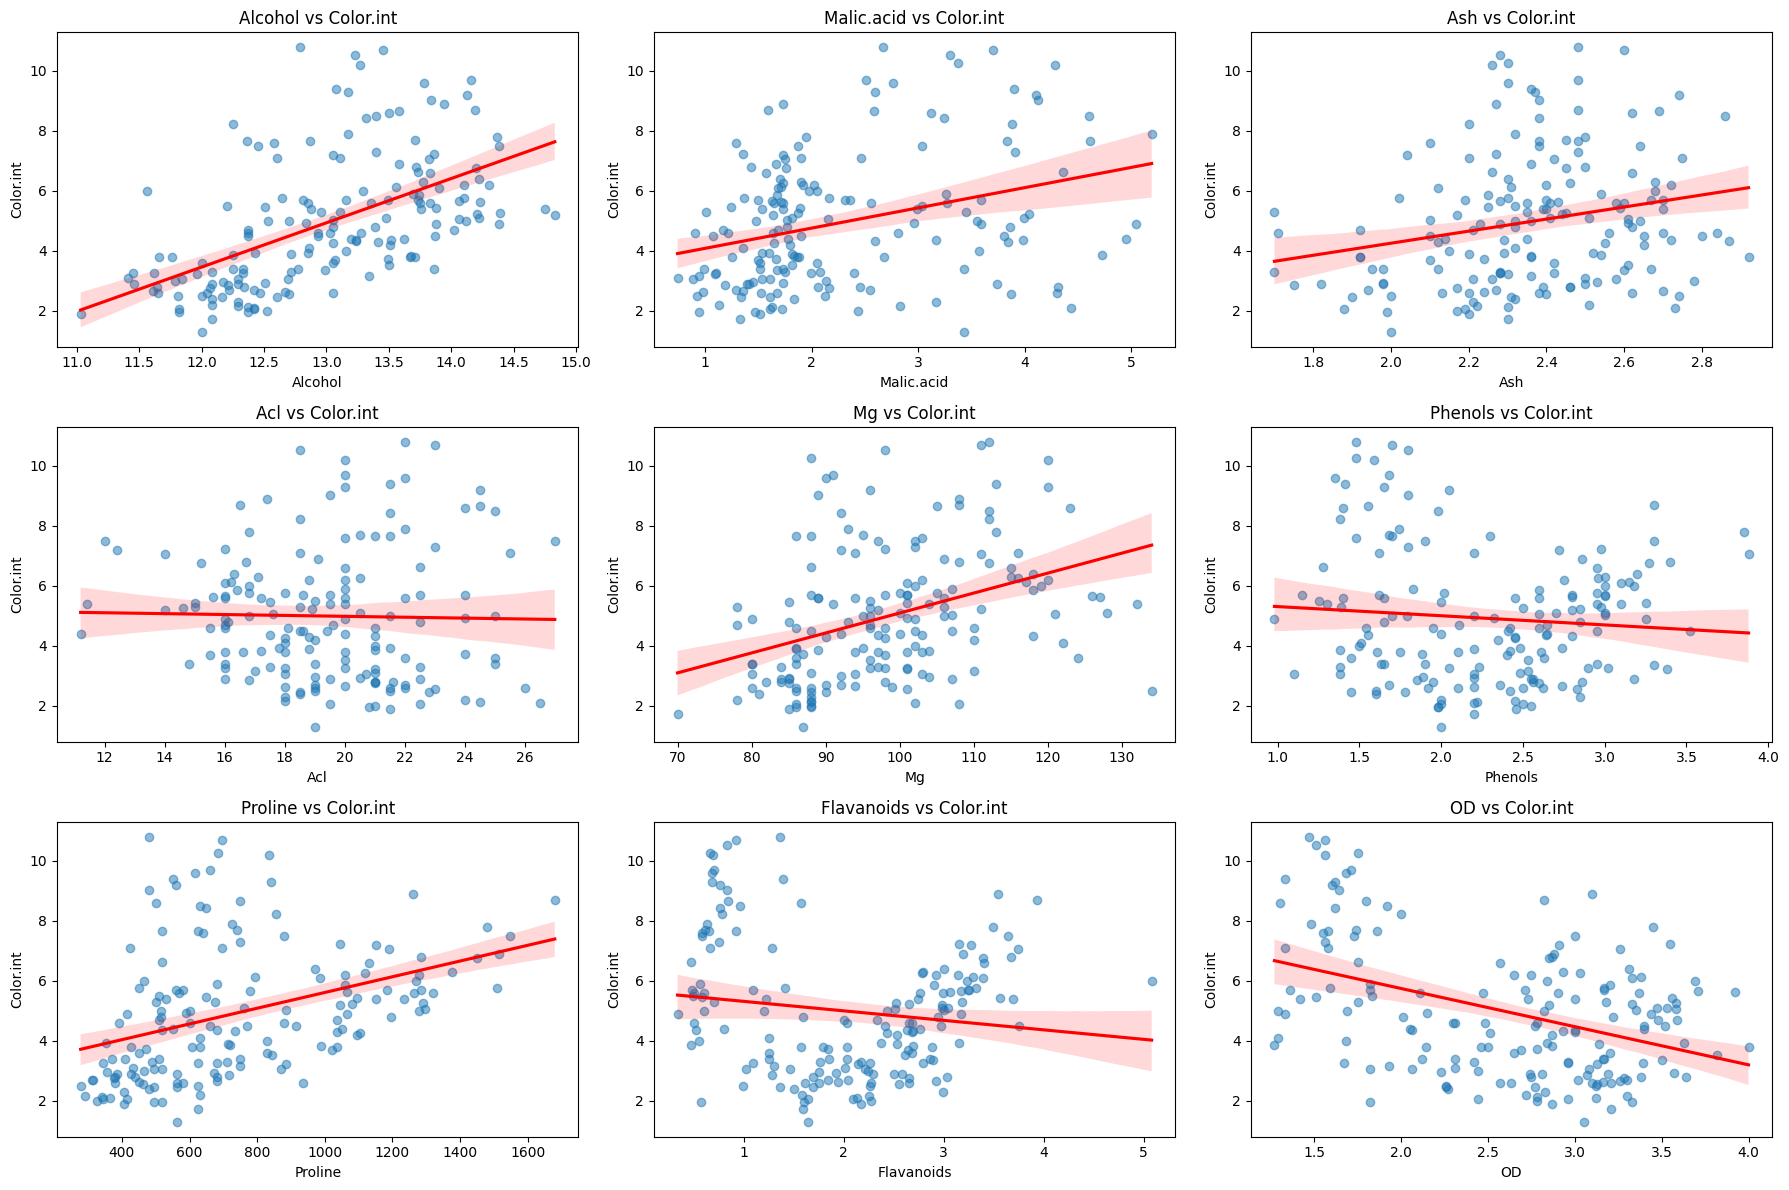

In [172]:
chemical_columns = ['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Proline','Flavanoids','OD']

plt.figure(figsize=(18, 12))

for i, column in enumerate(chemical_columns):
    plt.subplot(3, 3, i + 1)
    sns.regplot(x=column, y='Color.int', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'{column} vs Color.int')
    plt.xlabel(column)
    plt.ylabel('Color.int')

plt.tight_layout()
plt.show()

Alcohol, Proline, and Ash exhibit a strong and notable correlation with Color intensity, indicating that these components play a significant role in influencing the wine's color. On the other hand, Malic Acid, Mg, and Phenols show only a weak correlation with Color intensity, suggesting that their impact is relatively minor. Meanwhile, Acl, Flavanoids, and OD demonstrate very weak or virtually no correlation with color intensity, implying that these factors are largely unrelated to the wine's color characteristics.  

***

# 3. Data Enrichment

In [173]:
# Identify number of missing values in the dataset
wine_data.isna().sum()

Wine                     1
Alcohol                  3
Malic.acid               4
Ash                      3
Acl                     11
Mg                       5
Phenols                  4
Flavanoids               4
Nonflavanoid.phenols     1
Proanth                  4
Color.int                8
Hue                      0
OD                       1
Proline                  7
dtype: int64

## 3.1 Random Imputation
For Wine and Hue, I choose to use random imputation, because Wine and Hue are object data type, not numeric data.

In [174]:
# set random seed for reproducibility of the results
np.random.seed(3)
# extract non-missing values from Wine
non_missing_wines = wine_data.loc[wine_data["Wine"].notna(),"Wine"]
# extract indices of missing rows from the Wine column 
missing_wines_indices = wine_data.loc[wine_data["Wine"].isna(), "Wine"].index
# impute missing values 
wine_data.loc[missing_wines_indices,"Wine"] = np.random.choice(a=non_missing_wines,
                                                              size=missing_wines_indices.size)
#verify that there no missing values in the column wine
wine_data["Wine"].isna().sum()

0

In [175]:
# set random seed for reproducibility of the results
np.random.seed(5)
# extract non-missing values from Wine
non_missing_wines = wine_data.loc[wine_data["Hue"].notna(),"Hue"]
# extract indices of missing rows from the Wine column 
missing_wines_indices = wine_data.loc[wine_data["Hue"].isna(), "Hue"].index
# impute missing values 
wine_data.loc[missing_wines_indices,"Hue"] = np.random.choice(a=non_missing_wines,
                                                              size=missing_wines_indices.size)
#verify that there no missing values in the column wine
wine_data["Hue"].isna().sum()

0

## 3.2 Mean Imputation
For rest missing values I use mean imputation with numeric data.

In [176]:
# Columns that need mean imputation
columns_to_mean_impute = ['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 
                          'Phenols', 'Flavanoids', 'Nonflavanoid.phenols', 
                          'Proanth', 'Color.int', 'OD', 'Proline']

# Check for missing values before imputation
print("Missing values before imputation:")
print(df[columns_to_mean_impute].isna().sum())

# Calculate the mean of non-missing values for each column and fill missing values with this mean
for column in columns_to_mean_impute:
    # Calculate the mean of non-missing values, rounded to 2 decimal places
    non_missing_mean = np.round(df[df[column].notna()][column].mean(), 2) 
    # Fill missing values with the calculated mean
    df[column] = df[column].fillna(non_missing_mean)  

# Check for missing values after imputation
print("\nMissing values after imputation:")
print(df[columns_to_mean_impute].isna().sum())

Missing values before imputation:
Alcohol                  3
Malic.acid               4
Ash                      3
Acl                     11
Mg                       5
Phenols                  4
Flavanoids               4
Nonflavanoid.phenols     1
Proanth                  4
Color.int                8
OD                       1
Proline                  7
dtype: int64

Missing values after imputation:
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
OD                      0
Proline                 0
dtype: int64


***

# 4. Statistical Analysis
Find the mean and standard deviation for each component for each wine cultivator, write conclusions (findings), and identify significant differences between the different types of wine.

In [177]:
# Select only numeric columns for mean and std calculations
numeric_cols = df.select_dtypes(include=['number']).columns

# Group by 'Wine' and calculate mean and standard deviation for numeric columns
grouped = df.groupby('Wine')[numeric_cols].agg(['mean', 'std'])

# Display the results
print(grouped)

     Wine         Alcohol           Malic.acid                 Ash            \
     mean  std       mean       std       mean       std      mean       std   
Wine                                                                           
1.0   1.0  0.0  13.735254  0.471638   2.010678  0.688549  2.441017  0.203645   
2.0   2.0  0.0  12.301250  0.541469   1.888611  0.898683  2.247083  0.271674   
3.0   3.0  0.0  13.165745  0.531048   3.213404  1.001897  2.440426  0.185214   

            Acl            ... Nonflavanoid.phenols             Proanth  \
           mean       std  ...                 mean       std      mean   
Wine                       ...                                            
1.0   17.182373  2.529367  ...             0.290000  0.070049  1.899322   
2.0   19.874444  2.503704  ...             0.363611  0.123086  1.557917   
3.0   21.367234  2.265816  ...             0.446809  0.125388  1.164468   

               Color.int                  OD                Proline 

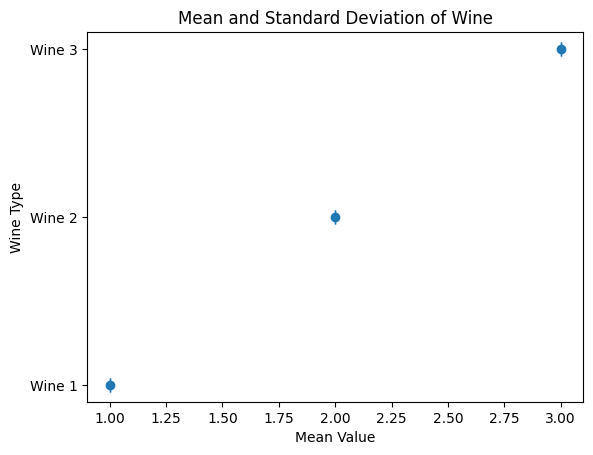

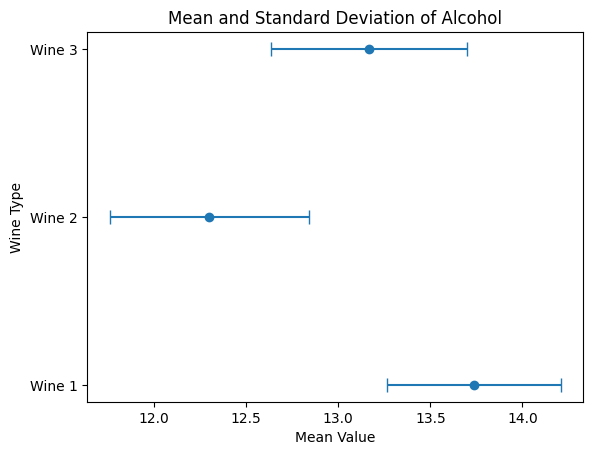

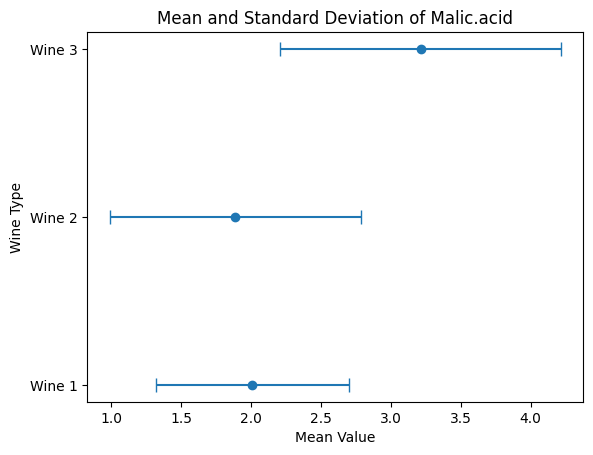

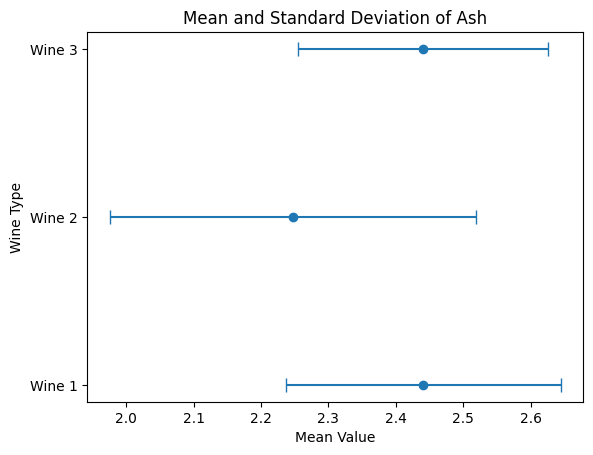

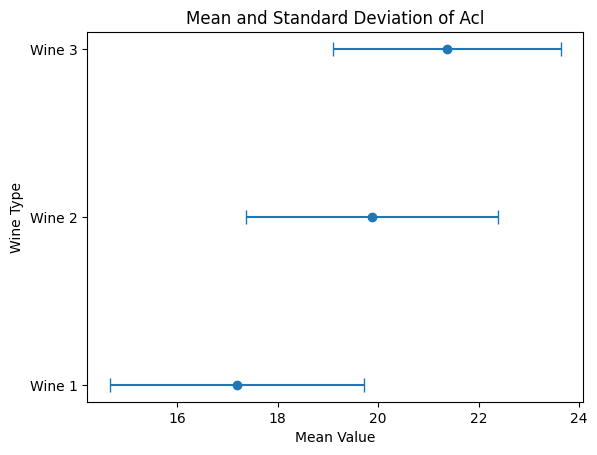

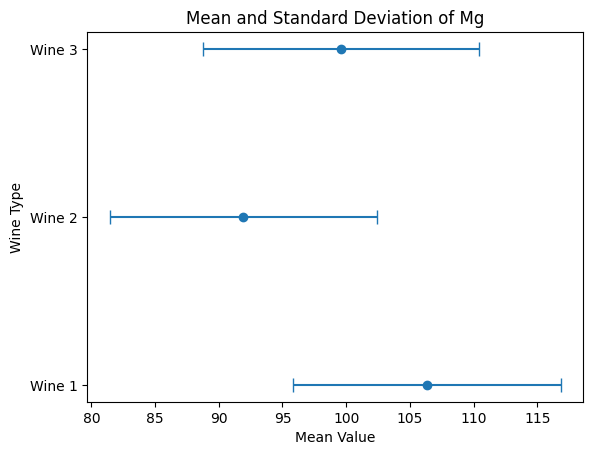

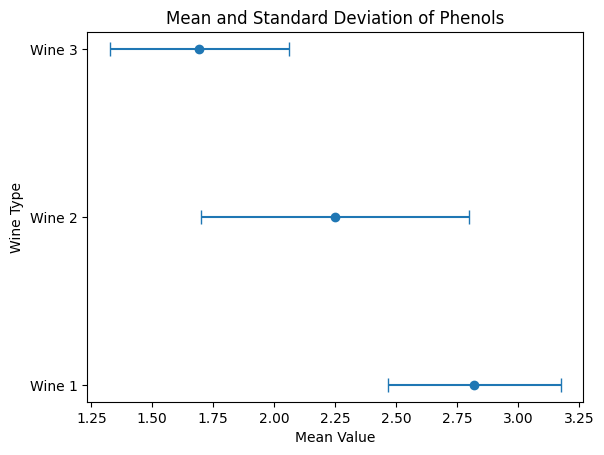

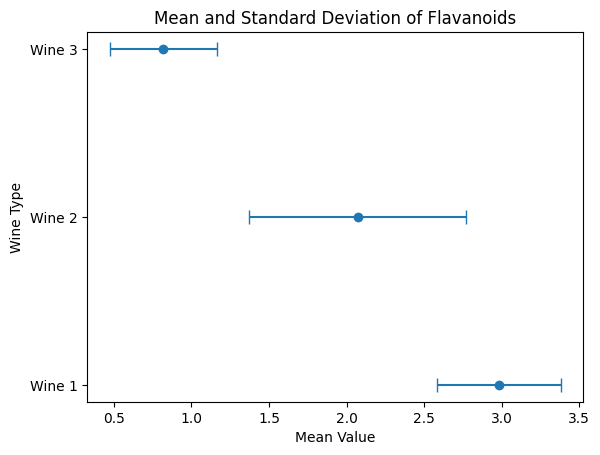

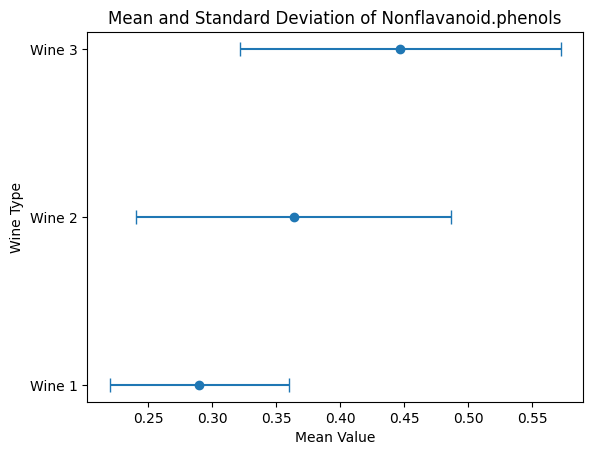

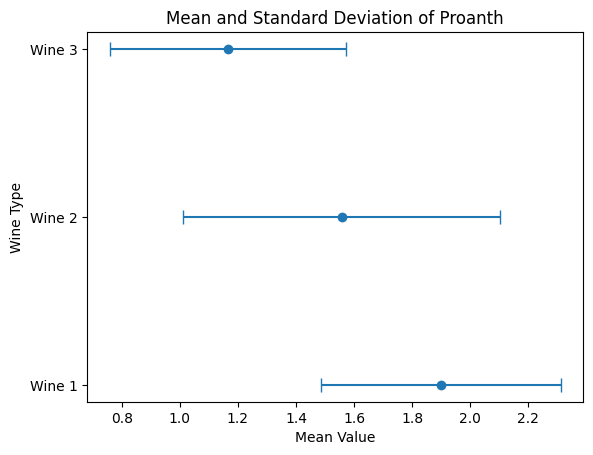

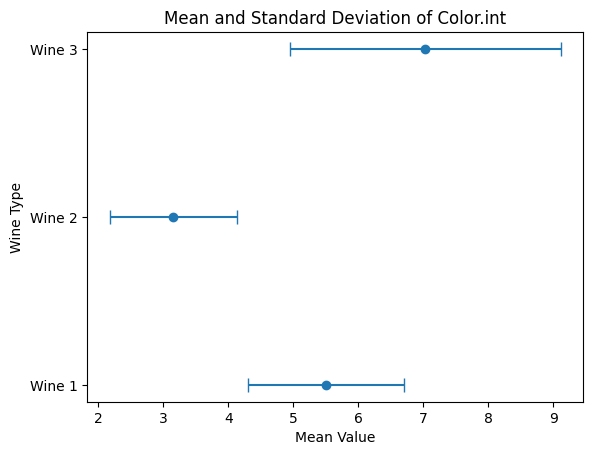

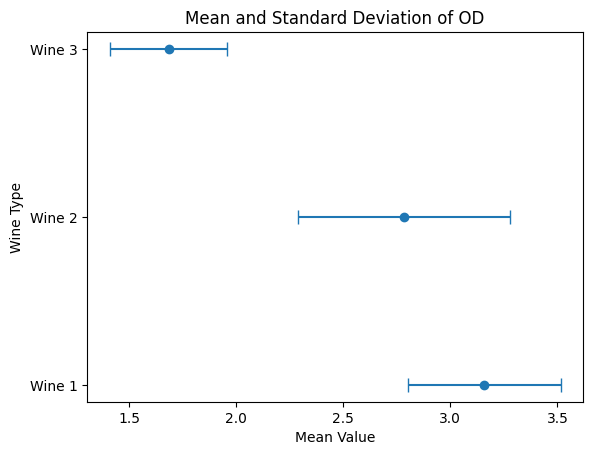

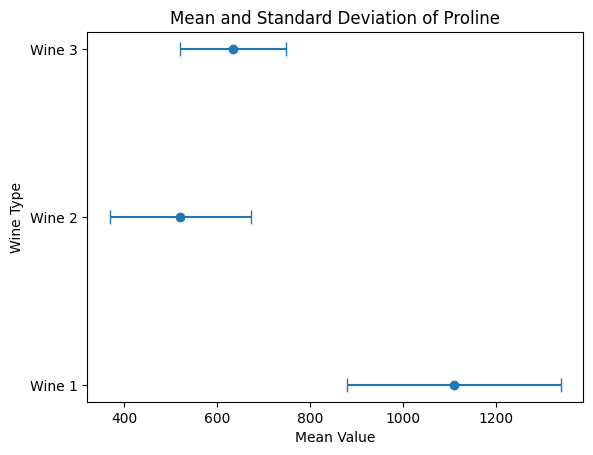

In [178]:
# Select only numeric columns for mean and std calculations
numeric_cols = df.select_dtypes(include=['number']).columns

# Group by 'Wine' and calculate mean and standard deviation for numeric columns
grouped = df.groupby('Wine')[numeric_cols].agg(['mean', 'std'])

# Separate the means and standard deviations
means = grouped.xs('mean', level=1, axis=1)
stds = grouped.xs('std', level=1, axis=1)

# Now, create the horizontal error bar plot for each component
components = means.columns
for component in components:
    plt.errorbar(x=means[component], y=['Wine 1', 'Wine 2', 'Wine 3'], xerr=stds[component], fmt='o', capsize=5)
    plt.title(f'Mean and Standard Deviation of {component}')
    plt.ylabel('Wine Type')
    plt.xlabel('Mean Value')
    plt.show()

From the table and Dot Plot with Error Bars, we can observe some notable differences 
in the chemical composition of the three wine cultivators:

1. **Alcohol Content**: Wine 1 has the highest mean alcohol content (13.735254), while Wine 2 has the lowest (12.294648). 
This suggests that Wine 1 is stronger in alcohol compared to the other two types.

2. **Malic Acid**: Wine 3 has the highest mean malic acid content (3.353830), while Wine 1 has the lowest (2.010678). 
This indicates a higher acidity in Wine 3 compared to Wine 1 and Wine 2.

3. **Acl (Total Phenol Index)**: Wine 3 has a higher mean value (21.371915) than Wine 1 (17.186102), 
indicating a higher phenolic content in Wine 3, which could contribute to a more complex taste profile.

4. **Proline**: Wine 1 has a significantly higher mean proline content (1108.175254) compared to Wine 2 (517.075211) 
and Wine 3 (634.049787). Proline is associated with the sweetness and age of the wine, suggesting that Wine 1 might be richer or older.

5. **Color Intensity**: Wine 3 has the highest mean color intensity (7.342979), whereas Wine 2 has the lowest (3.128592). 
This could imply that Wine 3 has a deeper color, which might be indicative of its aging process or the type of grapes used.

***

# 5. Correlation  
To find the correlation among the numerical columns for each cultivator, I'll use the Pearson Correlation Coefficient, which is well-suited for measuring linear relationships. Pearson Correlation Coefficient is ideal for this task since it evaluates the strength and direction of linear relationships between variables.

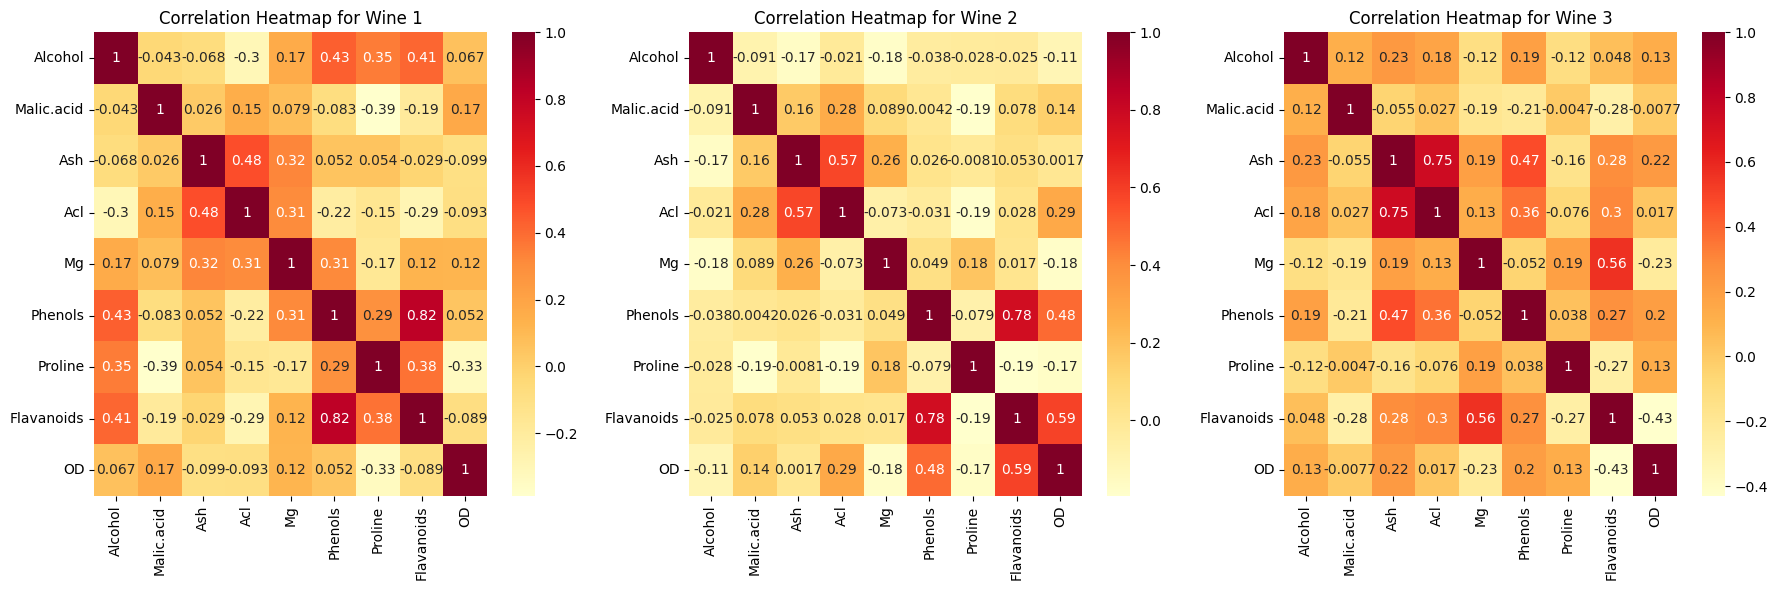

In [179]:
#correlation heatmap

# Calculate correlation matrices for each wine subset
correlation_wine_1 = wine_1[chemical_columns].corr()
correlation_wine_2 = wine_2[chemical_columns].corr()
correlation_wine_3 = wine_3[chemical_columns].corr()

# Plot the correlation heatmaps
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1) #row, column, index
sns.heatmap(correlation_wine_1, annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap for Wine 1')

plt.subplot(1, 3, 2)
sns.heatmap(correlation_wine_2, annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap for Wine 2')

plt.subplot(1, 3, 3)
sns.heatmap(correlation_wine_3, annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap for Wine 3')

plt.tight_layout()
plt.show()

For wine 1: There is a notably strong positive correlation between Phenols and Flavanoids (0.72). Additionally, Ash and Acl exhibit a fairly strong positive correlation (0.54).

For wine 2: A robust positive correlation is observed between Phenols and Flavanoids (0.77). Similarly, Ash and Acl also display a significant positive correlation (0.7).

For wine 3: The strongest positive correlation is seen between Ash and Acl (0.7). However, the correlation between Phenols and Flavanoids is relatively weaker (0.34).

In conclusion, positive correlations consistently exist between Phenols and Flavanoids, as well as between Ash and Acl, regardless of the wine type.

***

# 6. PCA&Kmeans 

Wine                    float64
Alcohol                 float64
Malic.acid              float64
Ash                     float64
Acl                     float64
Mg                      float64
Phenols                 float64
Flavanoids              float64
Nonflavanoid.phenols    float64
Proanth                 float64
Color.int               float64
Hue                     float64
OD                      float64
Proline                 float64
Cluster                   int32
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  177 non-null    float64
 1   Alcohol               175 non-null    float64
 2   Malic.acid            177 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   171 non-null    float64
 5   Mg                    177 non-null    f

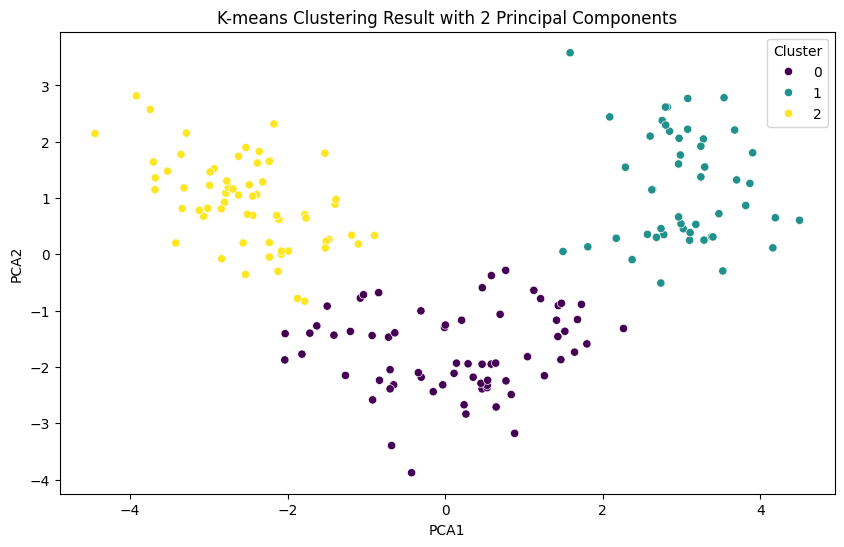

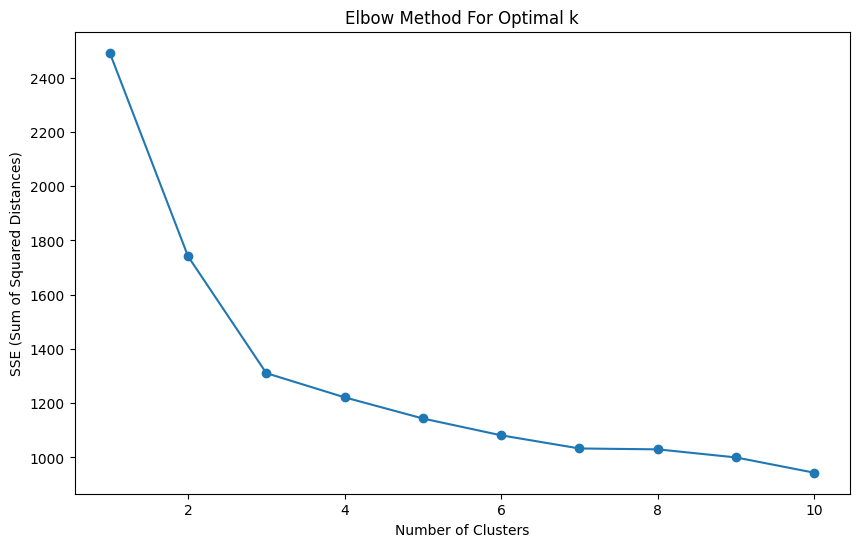

In [192]:
# Check data types to identify any non-numeric columns
print(df.dtypes)

df = pd.read_csv(filepath_or_buffer='wine.csv')

# Attempt to convert all columns to numeric, converting non-numeric values to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Check the data info again to see if there are any non-numeric columns or missing values
print(df.info())

# Handle missing values (e.g., filling with the mean of the column or dropping missing values)
df.fillna(df.mean(), inplace=True)

# Data preprocessing - Standardization
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_df)

# Add clustering results to the original dataframe
df['Cluster'] = kmeans.labels_

# Visualize the clustering results - Use PCA to reduce the data to two principal components for visualization
from sklearn.decomposition import PCA

# Create a PCA object, specifying the reduction to 2 principal components
pca = PCA(n_components=2)

# Perform PCA on the standardized data; fit_transform calculates the principal components and transforms the data into the new principal component space
pca_df = pca.fit_transform(scaled_df)

# Convert the reduced data into a Pandas DataFrame and name the two columns as PCA1 and PCA2
pca_df = pd.DataFrame(pca_df, columns=['PCA1', 'PCA2'])

# Add clustering results to the PCA dataframe
pca_df['Cluster'] = df['Cluster']

# Plot the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('K-means Clustering Result with 2 Principal Components')
plt.show()

# Analyze suitable parameters for clustering - Use the elbow method to determine the optimal number of clusters
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Distances)')
plt.title('Elbow Method For Optimal k')
plt.show()

The K-means algorithm's clustering results for a dataset are displayed in this image. The data has been reduced to two dimensions using Principal Component Analysis (PCA) and plotted with two principal components, PCA1 and PCA2. Different colors represent different clusters, specifically 0 (purple), 1 (green), and 2 (yellow). The best K value should be 3.

* Clustering Results: It is evident that the data is separated into three separate groups.  Each cluster is relatively well-grouped, indicating that the K-means algorithm effectively grouped the data points.

* PCA Dimensionality Reduction Effect: The data visualisation becomes more understandable following the application of PCA. The clusters are clearly separated in the 2D space, suggesting that the K-means clustering results are well-represented even after dimensionality reduction.

* Clustering Quality: Even though the clusters are easily seen, several of the data points seem to be somewhat off-center or on the edge of their respective clusters. This could be because these locations are inherently near the boundaries of several clusters in the higher-dimensional space, or it could be because of information loss during PCA.

The K-means clustering findings are correctly displayed in this figure, and the PCA makes the cluster separations highly understandable. Despite a few edge cases, the clustering is generally effective, correctly classifying the majority of data points into their corresponding groups. 


In [181]:
# View the cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers, columns=df.columns[:-1])  # Exclude 'Cluster' column from the center

print("Cluster Centers:")
print(cluster_centers_df)

Cluster Centers:
       Wine   Alcohol  Malic.acid       Ash       Acl        Mg   Phenols  \
0  0.088194 -0.482969   -1.136490 -1.388482 -0.611080 -1.090186  1.677942   
1  1.389052  0.417550    1.085587  0.465432  0.874315  0.034389 -0.780022   
2 -1.212665  0.986639   -0.167506 -0.117236 -0.842896  0.728448  1.002141   
3  0.088194 -0.911879   -0.556932  0.268606  0.551802  0.905911  0.441026   
4 -1.212665  1.249565   -0.479607  0.120242 -1.130370  0.161807  1.124002   
5  0.088194 -0.861626   -0.520770 -1.371313 -0.377005 -0.796858 -0.107050   
6  0.088194 -1.107323   -0.387577  0.245978  0.813441 -0.842114 -0.529996   
7 -0.562236 -0.193763    1.713610 -0.486831 -0.003137 -0.339266  0.646787   
8 -1.212665  0.662077   -0.485893  0.924827 -0.297256  0.549099  0.580951   
9  1.060688 -0.155390    0.527919 -0.130871  0.076203 -0.080754 -1.126853   

   Flavanoids  Nonflavanoid.phenols   Proanth  Color.int       Hue        OD  \
0    1.322375             -1.059792  0.775182  -0.04134

Cluster 0: This cluster has relatively high values for Phenols and Flavanoids, indicating that the samples in this cluster may contain higher amounts of phenolic substances and flavonoids. Additionally, the values for Proanth (proanthocyanidins) and Color.int (color intensity) are also high, suggesting these samples may have a darker color.

Cluster 1: In this cluster, Alcohol and Acl values are higher, while Malic.acid and Phenols values are lower. The samples in this cluster might have higher alcohol content but lower acidity and fewer phenolic substances.

Cluster 2: This cluster shows the lowest values for Acl and Phenols and a higher OD (optical density, or color intensity). This suggests that these samples may have a higher color intensity but lower content in other components.

Cluster 3: This cluster is characterized by high values for Proline and Mg, while Hue and Ash values are low. Samples in this cluster might have higher levels of amino acids (represented by Proline) and magnesium.

Cluster 4: This cluster has high values for Flavanoids, Proanth, and Alcohol, but lower values for Malic.acid and Mg. The samples in this cluster may have higher flavonoid content and alcohol content.

In [182]:
# Count the number of samples in each cluster
cluster_counts = df['Cluster'].value_counts()
print("Number of samples in each cluster:")
print(cluster_counts)

# View the mean values of features for each cluster
cluster_means = df.groupby('Cluster').mean()
print("Mean values of features for each cluster:")
print(cluster_means)


Number of samples in each cluster:
Cluster
0    67
2    62
1    49
Name: count, dtype: int64
Mean values of features for each cluster:
             Wine    Alcohol  Malic.acid       Ash        Acl          Mg  \
Cluster                                                                     
0        2.000000  12.281417    1.912239  2.224328  19.878912   92.656716   
1        2.957800  13.155406    3.343389  2.434694  21.356749   99.302433   
2        1.048387  13.667821    1.997903  2.466290  17.604631  107.967742   

          Phenols  Flavanoids  Nonflavanoid.phenols   Proanth  Color.int  \
Cluster                                                                    
0        2.237491    2.021443              0.361343  1.597313   3.065392   
1        1.685549    0.858707              0.448392  1.163061   7.244095   
2        2.829900    3.003226              0.292097  1.922097   5.433741   

              Hue        OD      Proline  
Cluster                                   
0        1.0

* Wine: Cluster 1 has the highest Wine value at 2.9578, indicating that the samples in this cluster may have higher wine-related characteristics.
* Alcohol: Cluster 2 has the highest Alcohol value at 13.667821, suggesting that the samples in this cluster likely have a higher alcohol content.
* Malic.acid: Cluster 1 has the highest Malic.acid value at 3.343389, indicating higher malic acid content in these samples.
* Phenols: Cluster 2 has the highest Phenols value at 2.829900, suggesting that these samples may contain more phenolic compounds.
* Flavanoids: Cluster 2 also has the highest Flavanoids value at 3.003226, meaning the samples in this cluster may contain more flavonoids.
* Proline: Cluster 2 has a significantly higher Proline value at 1089.185625, indicating that the samples in this cluster likely have a higher amino acid content.
* Color.int (Color Intensity): Cluster 1 has the highest Color.int value at 7.244095, indicating that these samples may have a deeper color.

Overall, Cluster 2 shows higher mean values in key components like Alcohol, Phenols, Flavanoids, and Proline, suggesting that this cluster might represent a type of wine with distinct chemical compositions and taste characteristics. Cluster 1, with higher Malic.acid and Color.int values, might represent wines with higher acidity and deeper color, while Cluster 0 seems to be more moderate in these features.

##  Original Features Correlate with the Clusters

In [183]:
cluster_means = df.groupby('Cluster').mean()
print("Mean values of features for each cluster:")
print(cluster_means)


Mean values of features for each cluster:
             Wine    Alcohol  Malic.acid       Ash        Acl          Mg  \
Cluster                                                                     
0        2.000000  12.281417    1.912239  2.224328  19.878912   92.656716   
1        2.957800  13.155406    3.343389  2.434694  21.356749   99.302433   
2        1.048387  13.667821    1.997903  2.466290  17.604631  107.967742   

          Phenols  Flavanoids  Nonflavanoid.phenols   Proanth  Color.int  \
Cluster                                                                    
0        2.237491    2.021443              0.361343  1.597313   3.065392   
1        1.685549    0.858707              0.448392  1.163061   7.244095   
2        2.829900    3.003226              0.292097  1.922097   5.433741   

              Hue        OD      Proline  
Cluster                                   
0        1.056060  2.775075   508.211486  
1        0.685918  1.710352   633.887934  
2        1.064469  

- **Cluster 0**:
  - The **Wine** value is 2, indicating that this cluster mainly contains the first type of wine.
  - The **Alcohol** value is 12.281417, which is the lowest among the three clusters, suggesting that this cluster has relatively low alcohol content.
  - The **Proline** value is 508.211486, which is also the lowest, possibly indicating lower amino acid content.
  - The **Phenols** and **Flavanoids** values are relatively high at 2.237491 and 2.021443, respectively, indicating higher content of phenolic and flavonoid compounds in this cluster.

- **Cluster 1**:
  - The  **Wine** value is 2.957800, indicating that this cluster mainly contains the second type of wine.
  - The **Malic.acid** value is 3.343389, the highest among the three clusters, suggesting that this cluster has higher malic acid content, which could make these wines more acidic.
  - The **Color.int** value is 7.244095, also the highest, indicating that these wines have a deeper color.
  - The **Alcohol** value is 13.155406, which is at a mid-range level.

- **Cluster 2**:
  - The **Wine** value is 1.048387, indicating that this cluster mainly contains the third type of wine.
  - The **Alcohol** value is 13.667821, the highest among the three clusters, indicating that this cluster has the highest alcohol content.
  - The **Proline** value is 1089.185625, the highest, indicating that these wines have the highest amino acid content.
  - The **Phenols** and **Flavanoids** values are also the highest at 2.829900 and 3.003226, respectively, indicating the highest content of these compounds in this cluster.

Overall, **Cluster 0** may represent wines with higher phenolic and flavonoid content but lower alcohol content; **Cluster 1** represents wines with higher malic acid content and deeper color; and **Cluster 2** likely represents wines with high alcohol content and rich in amino acids. These differences in feature values help further understand the chemical composition and potential taste characteristics of each cluster.


In [184]:
correlations = df.corr()
print("Correlation matrix between features and cluster labels:")
print(correlations['Cluster'].sort_values(ascending=False))

Correlation matrix between features and cluster labels:
Cluster                 1.000000
Proline                 0.787861
Alcohol                 0.735744
Mg                      0.457905
Color.int               0.456304
Flavanoids              0.409572
Phenols                 0.393635
Ash                     0.379234
Proanth                 0.232584
OD                      0.218359
Malic.acid              0.044040
Hue                     0.000770
Nonflavanoid.phenols   -0.229051
Acl                    -0.289287
Wine                   -0.509685
Name: Cluster, dtype: float64


**Proline**  has the highest correlation with the cluster labels, with a value of 0.787861. This indicates that Proline is one of the most influential features in determining the clusters.  
**Alcohol** shows a high correlation of 0.735744, suggesting that alcohol content is very important in distinguishing between the clusters.  
Mg and Color.int have correlations of 0.457905 and 0.456304, respectively. While these correlations are lower than those of Proline and Alcohol, they are still significant.   
**Flavanoids** and **Phenols** have correlations of 0.409572 and 0.393635, respectively, indicating that these components also play a role in the clustering.  
The feature with the strongest negative correlation is **Wine**, with a value of -0.509685, suggesting that this feature had an opposite effect in the clustering process.

Overall, these results indicate that Proline, Alcohol, and Mg are the main features influencing the clustering, while features like Wine and Acl exhibit negative correlations, possibly contributing to distinguishing samples into different clusters.

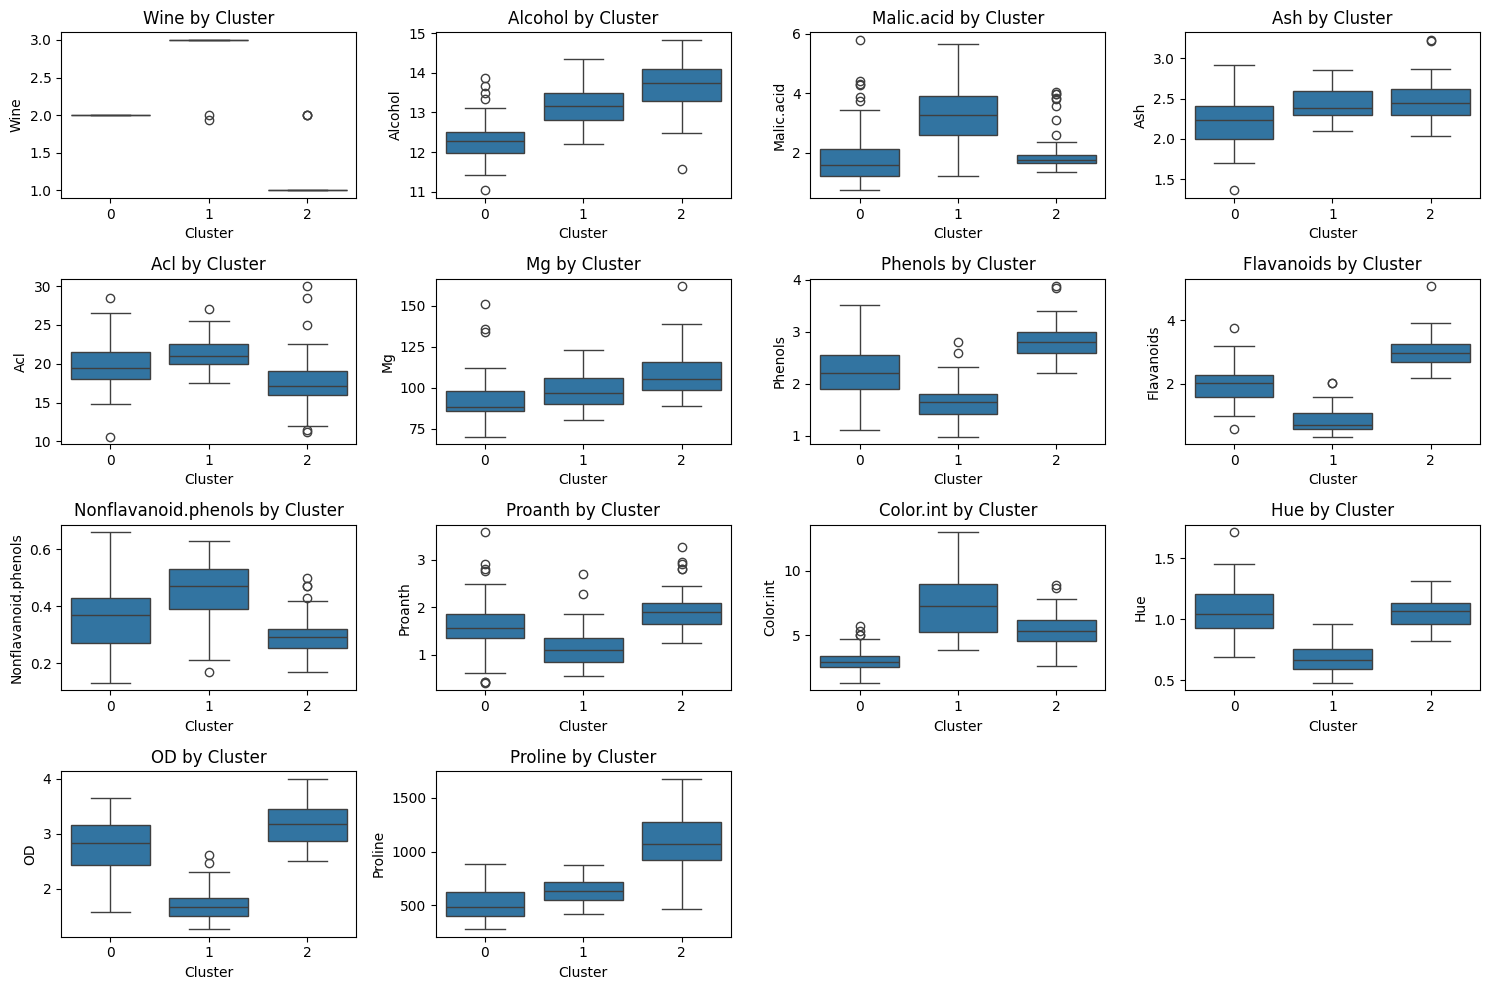

In [185]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='Cluster', y=column, data=df)
    plt.title(f'{column} by Cluster')
plt.tight_layout()
plt.show()


* Wine: It can be observed that Wine values are very similar in Cluster 0 and Cluster 2, whereas Cluster 1 has significantly higher Wine values, suggesting that Cluster 1 might represent a different type of wine compared to the others.

* Alcohol: Cluster 1 has significantly higher Alcohol values than the other two clusters, indicating that Cluster 1 might contain samples with higher alcohol content.

* Malic.acid: Cluster 1 also shows significantly higher Malic.acid values, indicating that samples in this cluster might have higher malic acid content.

* Ash: The Ash values are relatively similar across all three clusters, showing only minor differences.

* Acl: Although there is some overlap in Acl values among the three clusters, Cluster 1 has a more concentrated distribution with a higher median.

* Mg: Cluster 2 has significantly higher Mg values, suggesting that samples in this cluster might contain more magnesium.

* Phenols: Cluster 2 has significantly higher Phenols values compared to the other two clusters, indicating that this cluster might be rich in phenolic compounds.

* Flavanoids: Cluster 2 also shows the highest Flavanoids values, indicating a higher proportion of flavonoids in this cluster.

* Nonflavanoid.phenols: Cluster 0 has the highest Nonflavanoid.phenols values, while Cluster 2 has the lowest, suggesting a significant difference in non-flavonoid phenol content between these clusters.

* Proanth: Cluster 2 has the highest Proanth values, indicating higher proanthocyanidin content in this cluster.

* Color.int: Cluster 1 has significantly higher Color.int values, indicating deeper color intensity in this cluster.

* Hue: Cluster 1 has the lowest Hue values, while Cluster 0 has the highest, showing a significant difference in color tone between these clusters.

* OD: Cluster 2 shows significantly higher OD values, indicating higher optical density (color intensity) in this cluster.

* Proline: Cluster 2 has significantly higher Proline values, suggesting higher amino acid content in this cluster.

Overall, Cluster 1 stands out in Alcohol, Malic.acid, and Color.int, while Cluster 2 has higher values in Phenols, Flavanoids, and Proline, indicating distinct differences in alcohol content, acidity, color intensity, and chemical composition between these clusters.

## Summary

Cluster 0 is more moderate in these features  
Cluster 1 stands out in Alcohol, Malic.acid, and Color.int  
Cluster 2 shows higher values in Phenols, Flavanoids, and Proline.
- Proline has the highest correlation with the cluster labels, making it one of the most influential features in determining the clusters.
- Alcohol also shows a high correlation, suggesting that alcohol content is crucial for distinguishing between clusters.
- Mg and Color.int have moderate correlations, still significant for clustering.
- Phenols and Flavanoids play roles in the clustering process, with moderate correlations.
- Wine shows a strong negative correlation, suggesting that this feature has an opposite influence across different clusters.  

The result is same as EDA (Probline and Alcohol has a strong correlation).   
We may be able to distinguish different clusters or different cultivators of wines by Proline and Alcohol.   

***

# 7. Data Analysis

## Q: What is the average alcohol content of each wine cultivator?

In [186]:
# Calculate the mean alcohol for 3 cultivators
mean_alcohol = wine_data.groupby('Wine')['Alcohol'].mean()
mean_alcohol

Wine
1.0    13.735254
2.0    12.301250
3.0    13.165745
Name: Alcohol, dtype: float64

It can be observed that the mean alcohol for each

## Q: Which cultivator have alcohol content above the average level?

In [187]:
# Calculate the mean alcohol for 3 cultivators
mean_alcohol = wine_data.groupby('Wine')['Alcohol'].mean()
mean_alcohol

Wine
1.0    13.735254
2.0    12.301250
3.0    13.165745
Name: Alcohol, dtype: float64

It can be observed that the mean alcohol content for each wine group is 13.75, 12.29, and 13.17, respectively.

## Q: By cultivators, which components are above the mean in each cultivator?

In [188]:
mean_alcohol_whole = wine_data['Alcohol'].mean()
mean_alcohol_whole

13.004831460674161

It can be observed that the mean values alcohol for each wine group are 13.75, 12.29, and 13.17 respectively.

## Q: Which wine cultivators have color intensity above the average level?

In [189]:
mean_color_int = wine_data.groupby('Wine')['Color.int'].mean()
mean_color_int

Wine
1.0    5.502881
2.0    3.151389
3.0    7.027021
Name: Color.int, dtype: float64

In [190]:
mean_color_int_whole = wine_data['Color.int'].mean()
mean_color_int_whole

4.954157303370787

It is obvious that color intensity from wine 1.0 and wine 3.0 are higher than average.

## Q: Which cultivator of wine is better?

In [191]:
numeric_columns = wine_data.select_dtypes(include=['float64', 'int64']).columns

# define better and best
higher_is_better = ['Alcohol', 'Phenols', 'Flavanoids', 'Proanth', 'Color.int', 'OD', 'Proline']
moderate_is_best = ['Malic.acid', 'Ash', 'Acl', 'Mg', 'Nonflavanoid.phenols']

# calculate overall mean and mean of different cultivators
overall_mean = wine_data[numeric_columns].mean()
wine_group_means = wine_data.groupby('Wine')[numeric_columns].mean()

comparison = pd.DataFrame(index=wine_group_means.index)

# for higher_is_better variables，if > overall mean，note as True
for column in higher_is_better:
    if column in numeric_columns:
        comparison[column] = wine_group_means[column] > overall_mean[column]

# for moder_is_better variables，if value approaches to overall mean，note as True
for column in moderate_is_best:
    if column in numeric_columns:
        comparison[column] = abs(wine_group_means[column] - overall_mean[column]) < overall_mean[column] * 0.1

# compute the True num in each cultivator
comparison['Good_Features_Count'] = comparison.sum(axis=1)

# find the best cultivator
best_wine_type = comparison['Good_Features_Count'].idxmax()

overall_mean, wine_group_means, comparison, best_wine_type

(Wine                      1.932584
 Alcohol                  13.004831
 Malic.acid                2.278876
 Ash                       2.362416
 Acl                      19.376292
 Mg                       98.728371
 Phenols                   2.291854
 Flavanoids                2.043258
 Nonflavanoid.phenols      0.361180
 Proanth                   1.567191
 Color.int                 4.954157
 OD                        2.617247
 Proline                 745.169607
 dtype: float64,
       Wine    Alcohol  Malic.acid       Ash        Acl          Mg   Phenols  \
 Wine                                                                           
 1.0    1.0  13.735254    2.010678  2.441017  17.182373  106.338983  2.821525   
 2.0    2.0  12.301250    1.888611  2.247083  19.874444   91.925694  2.249028   
 3.0    3.0  13.165745    3.213404  2.440426  21.367234   99.595745  1.692553   
 
       Flavanoids  Nonflavanoid.phenols   Proanth  Color.int        OD  \
 Wine                             

It reveals that wine 1.0 performs better than else. Wine 1.0 is the best wine.